<a href="https://colab.research.google.com/github/MaliheDahmardeh/project/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import os

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(color_codes = True)
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#import data commit

In [54]:
!ls

heart_2020_cleaned.csv	sample_data


In [55]:
heart_disease_df = pd.read_csv('heart_2020_cleaned.csv')

In [56]:
heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [57]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [58]:
heart_disease_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [59]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [60]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# data cleaning

In [61]:
heart_disease_df.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
print(heart_disease_df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


In [63]:
heart_disease_df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [64]:
heart_disease_df.dropna()
heart_disease_df.fillna('non values', inplace =True)
heart_disease_df.drop_duplicates()
heart_disease_df=heart_disease_df.drop_duplicates()

In [65]:
heart_disease_df.reset_index()

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301713,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301714,319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301715,319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [66]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [67]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [68]:
heart_disease_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [69]:
import datetime
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

#Data Visualization

Data Heart Disease percentage

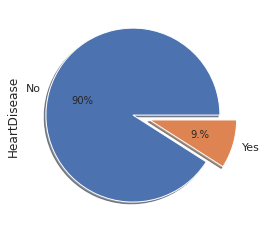

In [70]:
heart_disease_df['HeartDisease'].value_counts('Yes').plot.pie(explode=[0,0.2],autopct=lambda x: str(x)[:2] + '%', shadow =True)
plt.show()

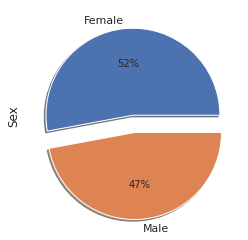

In [71]:
heart_disease_df['Sex'].value_counts().plot.pie(explode=[0,0.2],autopct=lambda x: str(x)[:2] + '%', shadow =True)
plt.show()

BMI and Heart Disease

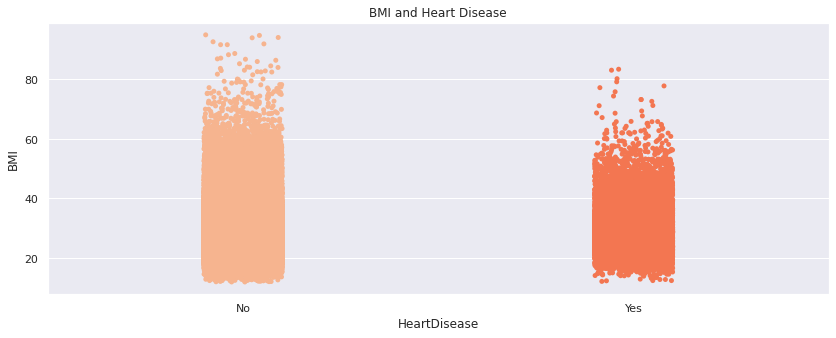

In [72]:
sb.set_palette('rocket_r')
plt.figure(figsize=(14, 5))
sb.stripplot(data=heart_disease_df, x='HeartDisease', y='BMI')
plt.title('BMI and Heart Disease')
plt.xlabel('HeartDisease')
plt.ylabel('BMI')
plt.show()

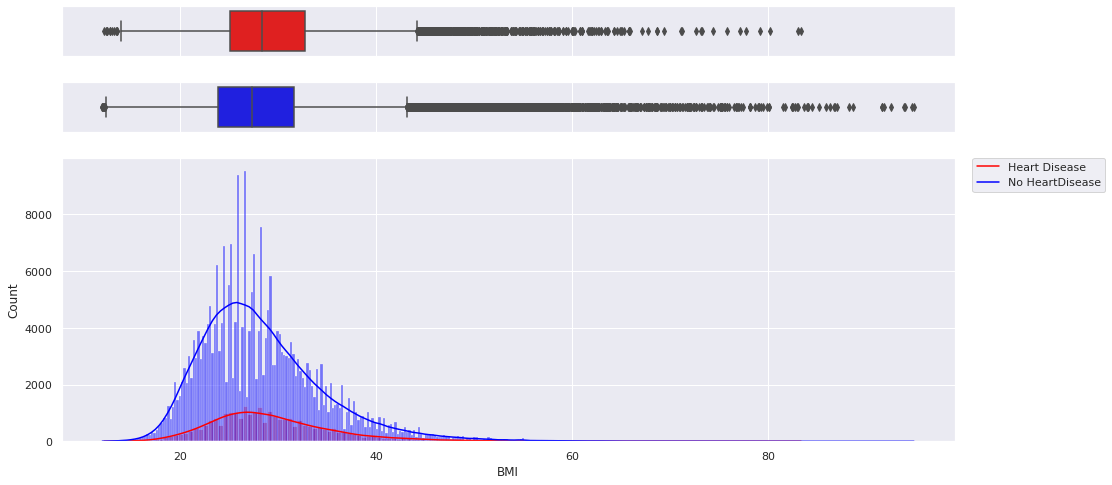

In [73]:
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.15, 0.85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sb.boxplot(x=heart_disease_df[heart_disease_df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="red")
sb.histplot(heart_disease_df[heart_disease_df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="red")

sb.boxplot(x=heart_disease_df[heart_disease_df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='blue')
sb.histplot(heart_disease_df[heart_disease_df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='blue')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

Heart Disease distribution based on Asthma

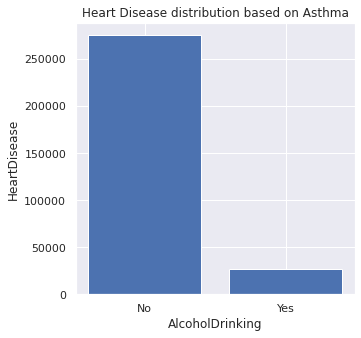

In [74]:
_X = heart_disease_df["AlcoholDrinking"].value_counts().index
_y = heart_disease_df["HeartDisease"].value_counts(["HeartDisease"]=="Yes")
plt.figure(figsize= (5,5))
plt.bar(_X,_y)
plt.title('Heart Disease distribution based on Asthma')
plt.xlabel('AlcoholDrinking')
plt.ylabel('HeartDisease')
plt.show()

Heart Disease distribution based on Asthma

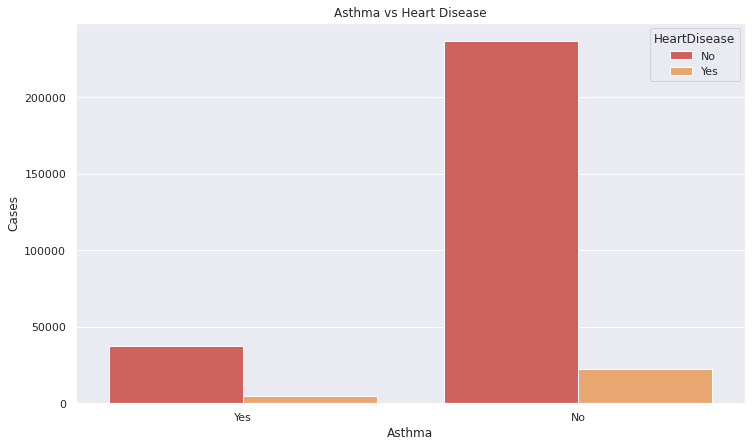

In [75]:
sb.set_palette('Spectral')
plt.figure(figsize=(12,7))
sb.countplot(data=heart_disease_df, x='Asthma', hue='HeartDisease')
plt.title('Asthma vs Heart Disease')
plt.xlabel('Asthma')
plt.ylabel('Cases')
plt.show()

heart disease distribution based on Smoking

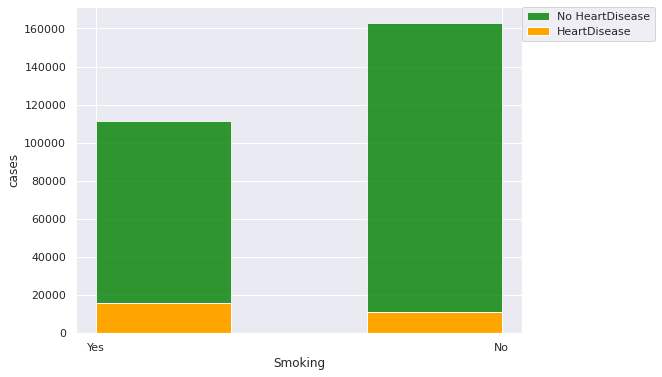

In [76]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(heart_disease_df[heart_disease_df["HeartDisease"]=="No"]["Smoking"], bins=3, alpha=0.8, color="green", label="No HeartDisease")
ax.hist(heart_disease_df[heart_disease_df["HeartDisease"]=="Yes"]["Smoking"], bins=3, alpha=1, color="orange", label="HeartDisease")
ax.set_xlabel("Smoking")
ax.set_ylabel("cases")
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

Disease compare based on Age Category

TypeError: ignored

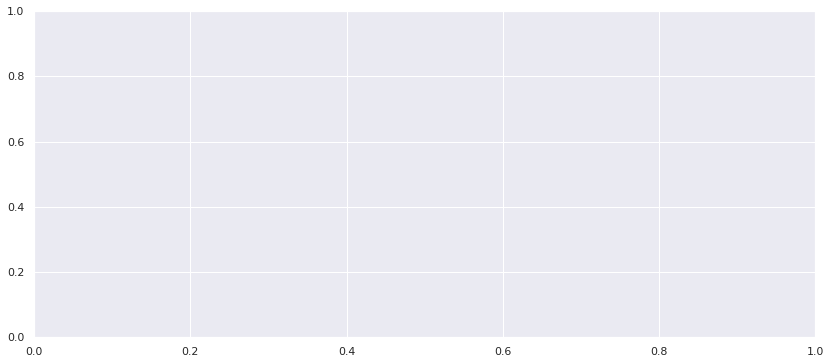

In [77]:
fig, ax = plt.subplots(figsize = (14,6))
plt(heart_disease_df[heart_disease_df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="red", label="HeartDisease", ax = ax)
plt(heart_disease_df[heart_disease_df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="blue", label="KidneyDisease", ax = ax)
plt(heart_disease_df[heart_disease_df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="green", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()


No handles with labels found to put in legend.


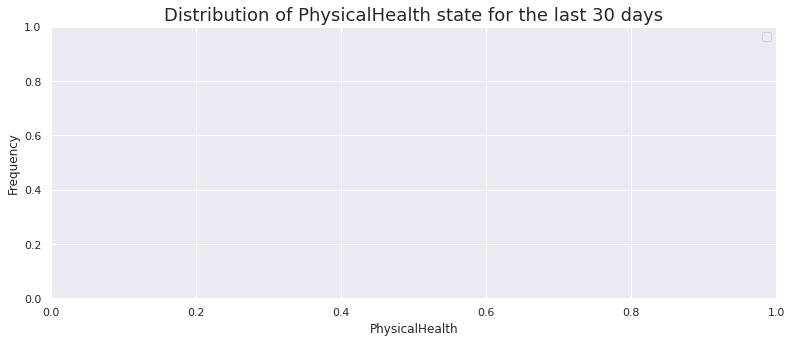

In [27]:
fig, ax = plt.subplots(figsize = (13,5))
sb.kdeplot(heart_disease_df[heart_disease_df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sb.kdeplot(heart_disease_df[heart_disease_df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

heart disease distribution based on AgeCategory

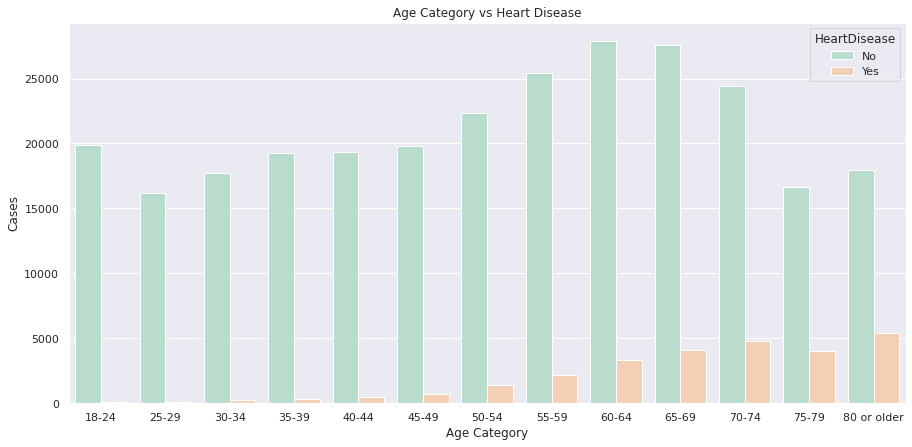

In [28]:
sb.set_palette('Pastel2')
plt.figure(figsize=(15,7))
sb.countplot(data=heart_disease_df, x='AgeCategory', hue='HeartDisease', order=['18-24', '25-29', '30-34', '35-39', '40-44',
                                                                      '45-49', '50-54', '55-59', '60-64', '65-69',
                                                                      '70-74', '75-79', '80 or older'])
plt.title('Age Category vs Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Cases')
plt.show()

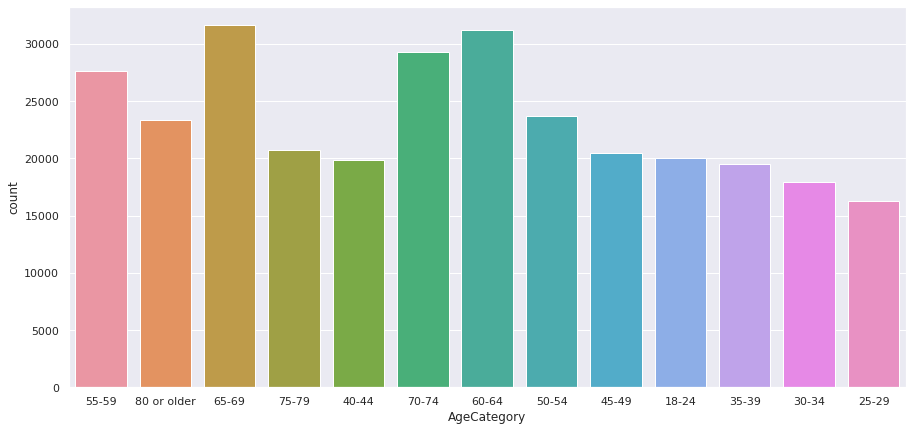

In [29]:
plt.figure(figsize=(15,7))
sb.countplot(data=heart_disease_df,x="AgeCategory")
plt.show()

heart disease distribution based on Race

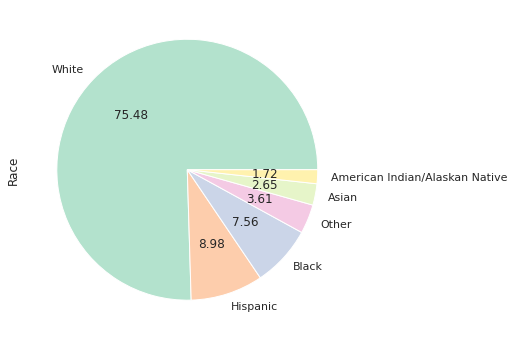

In [30]:
num_race = heart_disease_df['Race'].value_counts()
num_race.plot(kind='pie', autopct='%.2f', figsize=(6, 6))
#num_race.tite("heart disease distribution based on Smoking")

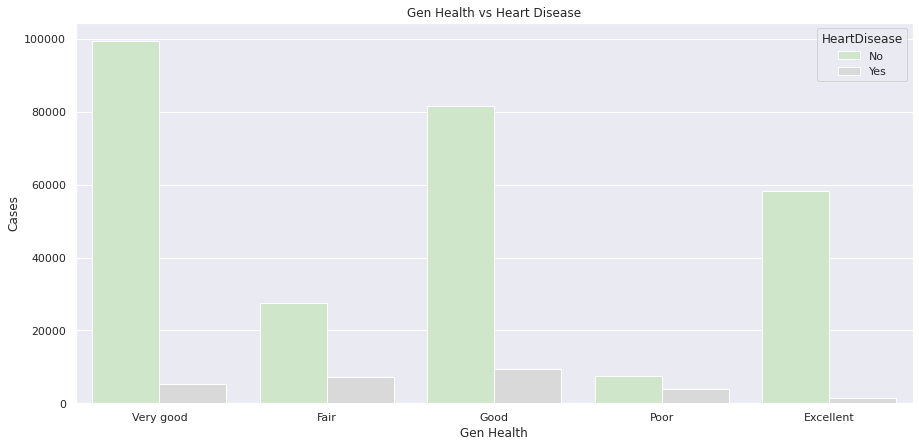

In [31]:
sb.set_palette('Set3_r')
plt.figure(figsize=(15,7))
sb.countplot(data=heart_disease_df, x='GenHealth', hue='HeartDisease')
plt.title('Gen Health vs Heart Disease')
plt.xlabel('Gen Health')
plt.ylabel('Cases')
plt.show()

#encoding

In [32]:
print('\nCategorical Columns\n')
heart_disease_df.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

binary categorical

In [40]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285050 non-null  float64
 1   BMI               301717 non-null  float64
 2   Smoking           285050 non-null  float64
 3   AlcoholDrinking   285050 non-null  float64
 4   Stroke            285050 non-null  float64
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       285050 non-null  float64
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  285050 non-null  float64
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            285050 non-null  float64
 16  KidneyDisease     28

In [47]:
heart_disease_df['Smoking'] = pd.Series(np.where(heart_disease_df['Smoking'] == 'Yes', 1, 0))
heart_disease_df['AlcoholDrinking'] = pd.Series(np.where(heart_disease_df['AlcoholDrinking'] == 'Yes', 1, 0))
heart_disease_df['Stroke'] = pd.Series(np.where(heart_disease_df['Stroke'] == 'Yes', 1, 0))
heart_disease_df['DiffWalking'] = pd.Series(np.where(heart_disease_df['DiffWalking'] == 'Yes', 1, 0))
heart_disease_df['PhysicalActivity'] = pd.Series(np.where(heart_disease_df['PhysicalActivity'] == 'Yes', 1, 0))
heart_disease_df['Asthma'] = pd.Series(np.where(heart_disease_df['Asthma'] == 'Yes', 1, 0))
heart_disease_df['KidneyDisease'] = pd.Series(np.where(heart_disease_df['KidneyDisease'] == 'Yes', 1, 0))
heart_disease_df['SkinCancer'] = pd.Series(np.where(heart_disease_df['SkinCancer'] == 'Yes', 1, 0))
heart_disease_df['HeartDisease'] = pd.Series(np.where(heart_disease_df['HeartDisease'] == 'Yes', 1, 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [34]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285050 non-null  float64
 1   BMI               301717 non-null  float64
 2   Smoking           285050 non-null  float64
 3   AlcoholDrinking   285050 non-null  float64
 4   Stroke            285050 non-null  float64
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       285050 non-null  float64
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  285050 non-null  float64
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            285050 non-null  float64
 16  KidneyDisease     28

for more than 2 value

In [35]:
le = LabelEncoder()
heart_disease_df['Sex']=le.fit_transform(heart_disease_df['Sex'])
heart_disease_df['AgeCategory']=le.fit_transform(heart_disease_df['AgeCategory'])
heart_disease_df['Race']=le.fit_transform(heart_disease_df['Race'])
heart_disease_df['Diabetic']=le.fit_transform(heart_disease_df['Diabetic'])
heart_disease_df['GenHealth']=le.fit_transform(heart_disease_df['GenHealth'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [36]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285050 non-null  float64
 1   BMI               301717 non-null  float64
 2   Smoking           285050 non-null  float64
 3   AlcoholDrinking   285050 non-null  float64
 4   Stroke            285050 non-null  float64
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       285050 non-null  float64
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  285050 non-null  float64
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            285050 non-null  float64
 16  KidneyDisease     28

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf01599150>,
      dtype=object)

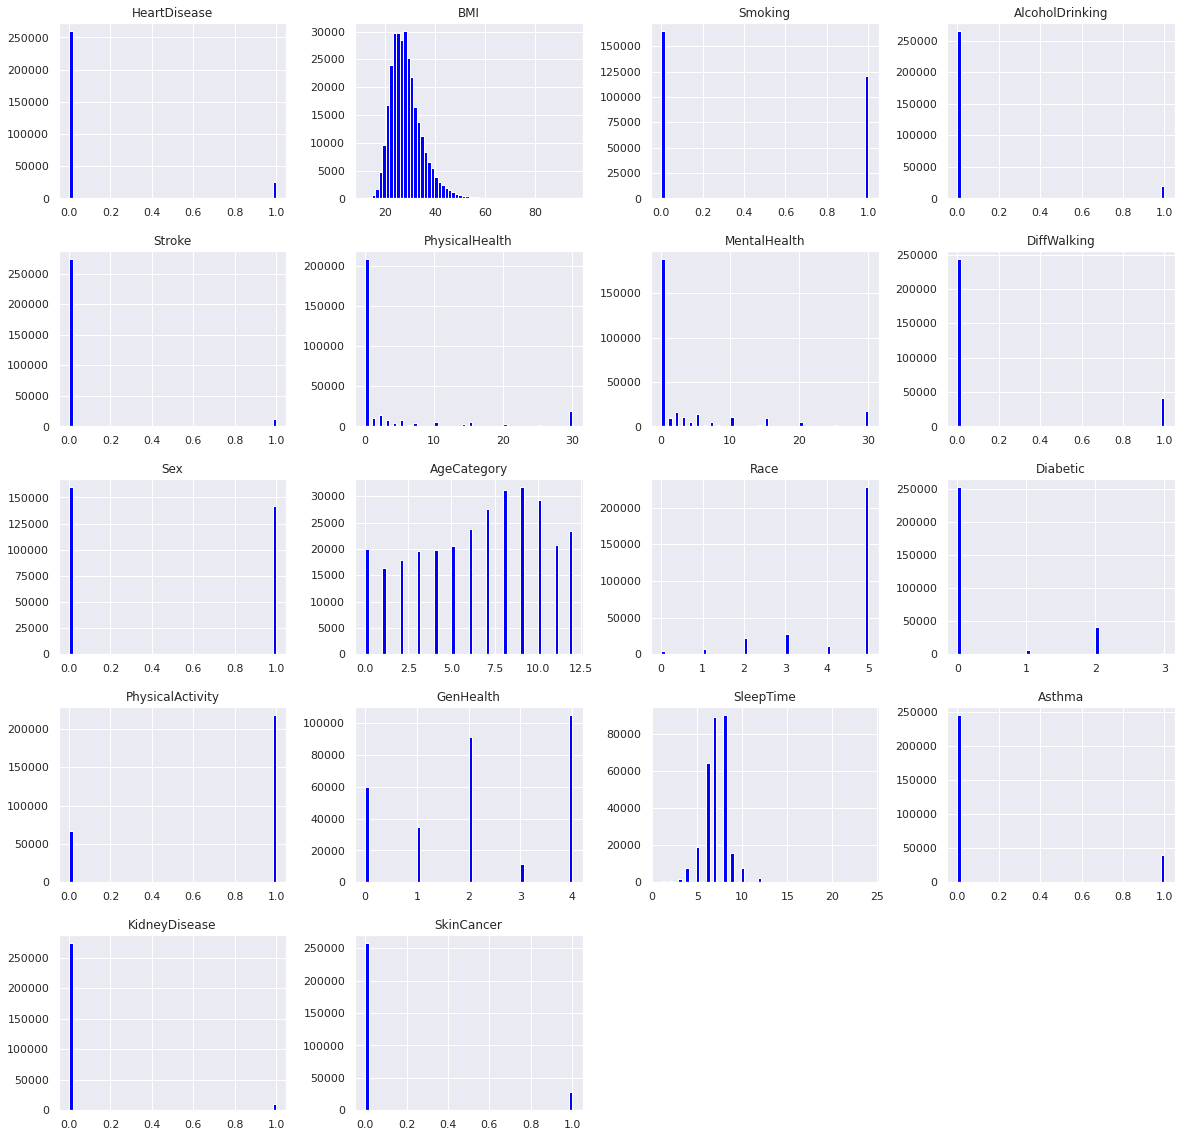

In [37]:
heart_disease_df.hist(bins = 60, figsize = (20 ,20) , color="blue")

In [38]:
heart_disease_df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,-0.001510,0.104820,-0.036081,0.194969,0.006031,0.002432,0.196618,-0.003050,0.010977,0.005573,0.005631,-0.094255,0.000671,0.002295,0.036058,0.141870,0.089861
BMI,-0.001510,1.000000,0.001020,-0.000530,-0.000703,0.103813,0.056724,0.004257,0.024200,-0.006069,-0.030300,0.198268,-0.006546,0.029233,-0.048653,0.000529,-0.002916,0.001846
Smoking,0.104820,0.001020,1.000000,0.109056,0.059118,0.000776,-0.002456,0.115214,0.001002,0.007358,0.007664,0.001048,-0.089256,0.003418,-0.001445,0.017411,0.031873,0.030561
AlcoholDrinking,-0.036081,-0.000530,0.109056,1.000000,-0.022464,-0.003564,-0.002086,-0.041447,0.003618,-0.004416,0.002683,-0.000174,0.024262,-0.001390,-0.004463,-0.007262,-0.030609,-0.009096
Stroke,0.194969,-0.000703,0.059118,-0.022464,1.000000,0.005771,0.002956,0.169285,-0.002592,0.003768,0.001488,0.001300,-0.074701,0.000295,-0.000855,0.035019,0.088457,0.045287
PhysicalHealth,0.006031,0.103813,0.000776,-0.003564,0.005771,1.000000,0.279657,0.007873,-0.038427,0.114623,0.010179,0.143418,-0.004559,-0.037669,-0.058406,0.001521,0.003593,0.000015
MentalHealth,0.002432,0.056724,-0.002456,-0.002086,0.002956,0.279657,1.000000,0.000925,-0.098916,-0.158608,-0.002489,0.022475,-0.004254,-0.005259,-0.117078,0.003360,0.002343,-0.000487
DiffWalking,0.196618,0.004257,0.115214,-0.041447,0.169285,0.007873,0.000925,1.000000,-0.003944,0.018348,0.002792,0.008743,-0.272130,-0.000938,0.002559,0.095371,0.148986,0.060623
Sex,-0.003050,0.024200,0.001002,0.003618,-0.002592,-0.038427,-0.098916,-0.003944,1.000000,-0.060620,0.015599,-0.010581,0.005593,-0.011778,-0.014901,0.003118,-0.003032,0.001382
AgeCategory,0.010977,-0.006069,0.007358,-0.004416,0.003768,0.114623,-0.158608,0.018348,-0.060620,1.000000,0.165041,0.199065,-0.010043,0.036864,0.105025,-0.007339,0.006495,0.015595


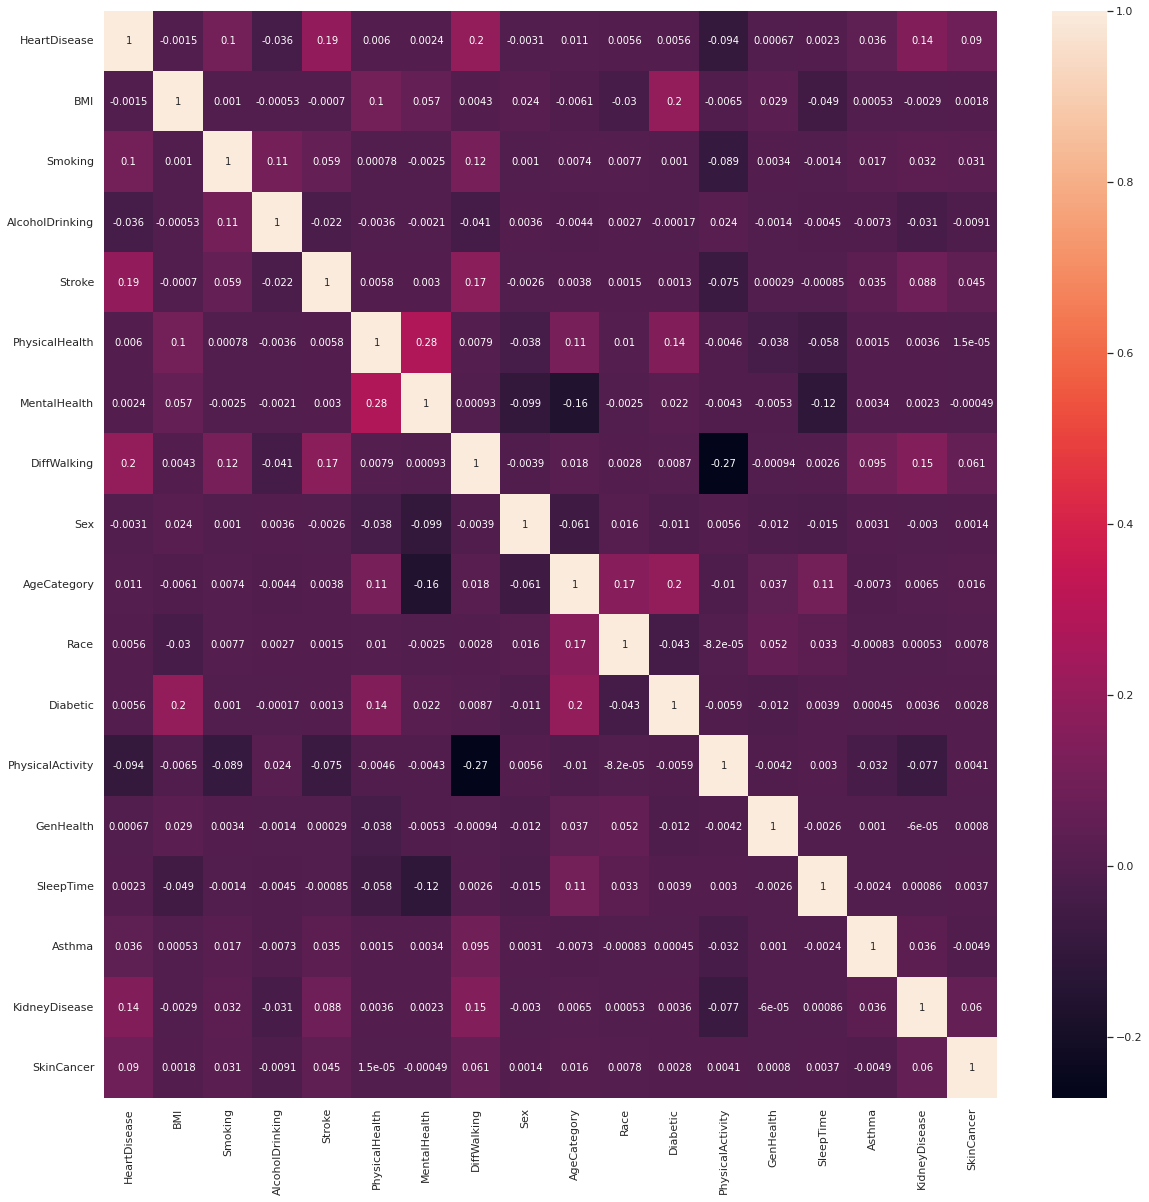

In [122]:
corr_matrix = heart_disease_df.corr()
plt.figure(figsize = (20,20))
sb_plot=sb.heatmap(corr_matrix,annot=True)
plt.show()

In [124]:
heart_disease_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0,7,5,2,1.0,4,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0,12,5,0,1.0,4,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1,9,5,2,1.0,1,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0,11,5,0,0.0,2,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0,4,5,0,1.0,4,8.0,0.0,0.0,0.0
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,0,11,2,0,0.0,1,12.0,0.0,0.0,0.0
6,0.0,21.63,0.0,0.0,0.0,15.0,0.0,0.0,0,10,5,0,1.0,1,4.0,1.0,0.0,1.0
7,0.0,31.64,1.0,0.0,0.0,5.0,0.0,1.0,0,12,5,2,0.0,2,9.0,1.0,0.0,0.0
8,0.0,26.45,0.0,0.0,0.0,0.0,0.0,0.0,0,12,5,1,0.0,1,5.0,0.0,1.0,0.0
9,0.0,40.69,0.0,0.0,0.0,0.0,0.0,1.0,1,9,5,0,1.0,2,10.0,0.0,0.0,0.0


In [39]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,NaN,31.93,NaN,NaN,NaN,0.0,0.0,NaN,1,9,3,0,NaN,2,7.0,NaN,NaN,NaN
319786,NaN,33.20,NaN,NaN,NaN,0.0,0.0,NaN,0,8,3,2,NaN,4,8.0,NaN,NaN,NaN
319787,NaN,36.54,NaN,NaN,NaN,7.0,0.0,NaN,1,2,3,0,NaN,2,9.0,NaN,NaN,NaN
319788,NaN,23.38,NaN,NaN,NaN,0.0,0.0,NaN,0,8,3,0,NaN,0,6.0,NaN,NaN,NaN
319789,NaN,22.22,NaN,NaN,NaN,0.0,0.0,NaN,0,0,3,0,NaN,0,8.0,NaN,NaN,NaN
319790,NaN,27.41,NaN,NaN,NaN,7.0,0.0,NaN,1,8,3,2,NaN,1,6.0,NaN,NaN,NaN
319791,NaN,29.84,NaN,NaN,NaN,0.0,0.0,NaN,1,3,3,0,NaN,4,5.0,NaN,NaN,NaN
319792,NaN,24.24,NaN,NaN,NaN,0.0,0.0,NaN,0,5,3,0,NaN,2,6.0,NaN,NaN,NaN
319793,NaN,32.81,NaN,NaN,NaN,0.0,0.0,NaN,0,1,3,0,NaN,2,12.0,NaN,NaN,NaN
319794,NaN,46.56,NaN,NaN,NaN,0.0,0.0,NaN,0,12,3,0,NaN,2,8.0,NaN,NaN,NaN


In [125]:
heart_disease_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

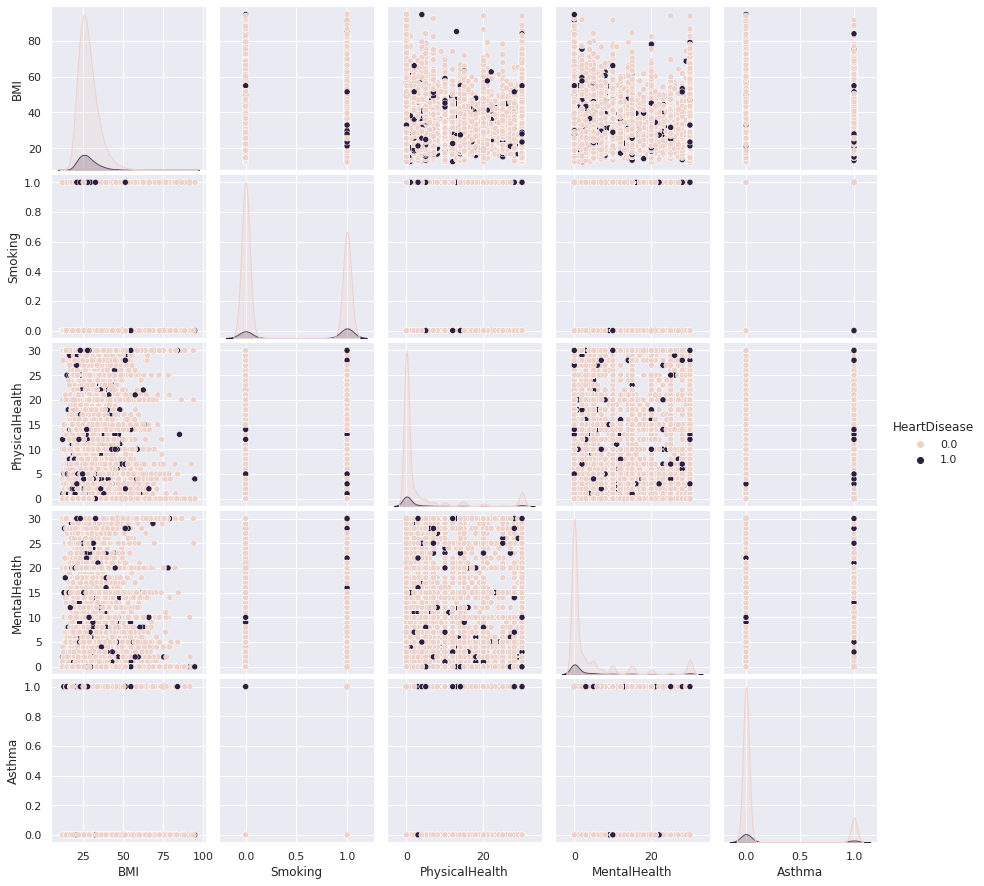

In [126]:
sb.pairplot(heart_disease_df, hue = 'HeartDisease', vars = ['BMI', 'Smoking', 'PhysicalHealth', 'MentalHealth','Asthma'] )

Remove extra columns

In [48]:
heart_disease_df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
heart_disease_df.describe()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
count,285050.0,301717.000000,285050.0,285050.0,301717.000000,301717.000000,285050.0,301717.000000,301717.000000,301717.000000,301717.000000,285050.0,285050.0,285050.0
mean,0.0,28.441970,0.0,0.0,3.572298,4.121475,0.0,0.470792,6.509408,4.365409,0.316926,0.0,0.0,0.0
std,0.0,6.468134,0.0,0.0,8.140656,8.128288,0.0,0.499147,3.584510,1.235817,0.732372,0.0,0.0,0.0
min,0.0,12.020000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.0,24.030000,0.0,0.0,0.000000,0.000000,0.0,0.000000,4.000000,5.000000,0.000000,0.0,0.0,0.0
50%,0.0,27.410000,0.0,0.0,0.000000,0.000000,0.0,0.000000,7.000000,5.000000,0.000000,0.0,0.0,0.0
75%,0.0,31.650000,0.0,0.0,2.000000,4.000000,0.0,1.000000,9.000000,5.000000,0.000000,0.0,0.0,0.0
max,0.0,94.850000,0.0,0.0,30.000000,30.000000,0.0,1.000000,12.000000,5.000000,3.000000,0.0,0.0,0.0


In [50]:
heart_disease_df.tail(10)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
319785,NaN,31.93,NaN,NaN,0.0,0.0,NaN,1,9,3,0,NaN,NaN,NaN
319786,NaN,33.20,NaN,NaN,0.0,0.0,NaN,0,8,3,2,NaN,NaN,NaN
319787,NaN,36.54,NaN,NaN,7.0,0.0,NaN,1,2,3,0,NaN,NaN,NaN
319788,NaN,23.38,NaN,NaN,0.0,0.0,NaN,0,8,3,0,NaN,NaN,NaN
319789,NaN,22.22,NaN,NaN,0.0,0.0,NaN,0,0,3,0,NaN,NaN,NaN
319790,NaN,27.41,NaN,NaN,7.0,0.0,NaN,1,8,3,2,NaN,NaN,NaN
319791,NaN,29.84,NaN,NaN,0.0,0.0,NaN,1,3,3,0,NaN,NaN,NaN
319792,NaN,24.24,NaN,NaN,0.0,0.0,NaN,0,5,3,0,NaN,NaN,NaN
319793,NaN,32.81,NaN,NaN,0.0,0.0,NaN,0,1,3,0,NaN,NaN,NaN
319794,NaN,46.56,NaN,NaN,0.0,0.0,NaN,0,12,3,0,NaN,NaN,NaN
